In [60]:
# how to perform a classification with TF
# how to identify and deal with overfitting through Early Stopping Callbacks and Dropout Layers

# this project will work with breast cancer data and predict whether a cancer is malignant or benign.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
df = pd.read_csv('/Users/vinhe/Code/Courses/Data Science Bootcamp/22-Deep Learning/DATA/cancer_classification.csv')

In [3]:
# first check for null values
df.info()
# all good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [62]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# EDA

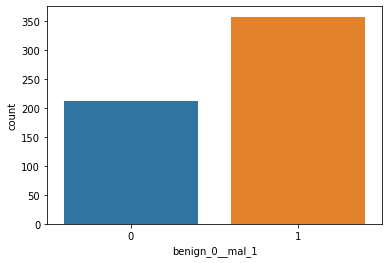

In [63]:
# always a good idea to do a count plot f the label to see the number f instances per label and see if it is a well balanced problem or not
sns.countplot(x='benign_0__mal_1',data=df)
# seems relatively balanced

In [64]:
# check out correlation between features themselves
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

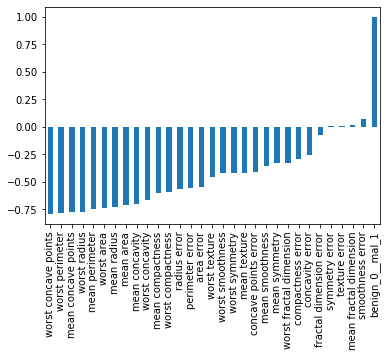

In [65]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')
# lets drop the perfectly correlated value of itself

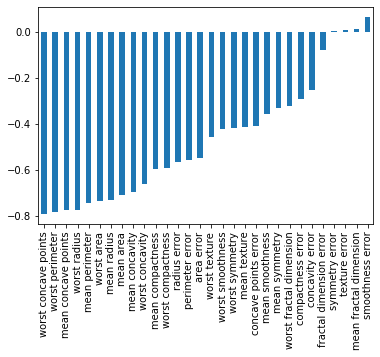

In [66]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
# they seem to be highly negatively correlated so should be able to make some strong predictions

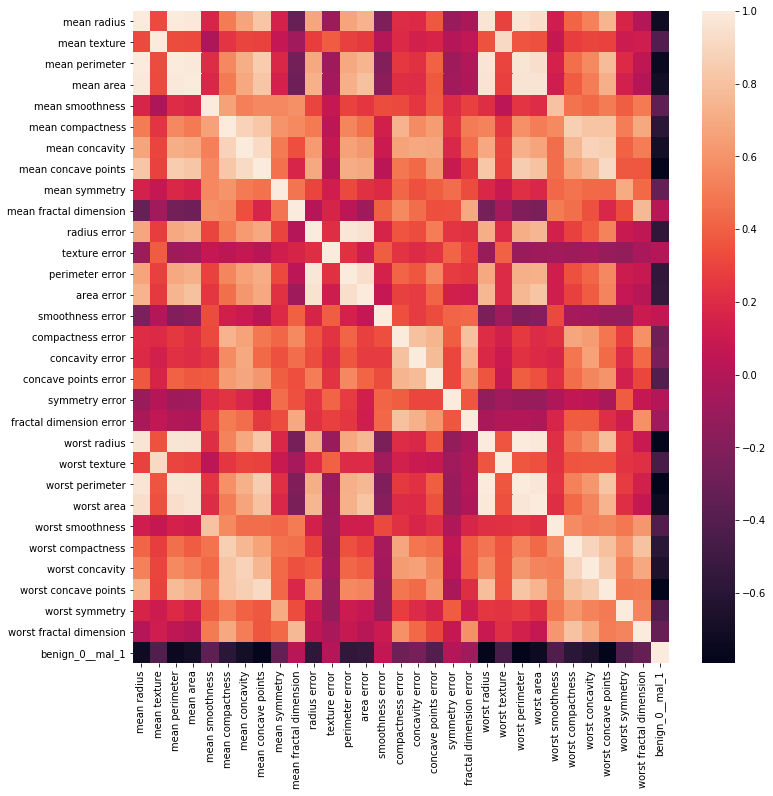

In [67]:
# check out correlation with every feature compared to every feature
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

# train test split

In [68]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [37]:
from sklearn.model_selection import train_test_split

In [103]:
# since small dataset, we'll choose a smaller test size
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [104]:
# scale data
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler = MinMaxScaler()

In [106]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [107]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create model

In [108]:
from tensorflow.keras.models import Sequential

In [109]:
from tensorflow.keras.layers import Dense,Dropout

In [110]:
X_train.shape
# can see we have 30 features

(426, 30)

In [111]:
model = Sequential()

# 30 neurons
model.add(Dense(30,activation='relu'))

# cut this in half
model.add(Dense(15,activation='relu'))

# choose sigmoid since this is a BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [112]:
# choose high number epochs to see what happens when you overfit your training data, so we will also pass in our validation data
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6826 - val_loss: 0.6623
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6487 - val_loss: 0.6275
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6143 - val_loss: 0.5914
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5777 - val_loss: 0.5532
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5401 - val_loss: 0.5149
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5022 - val_loss: 0.4789
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4623 - val_loss: 0.4313
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4143 - val_loss: 0.3814
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3704 - val_loss: 0.3398
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3355 - val_loss: 0.3011
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.0502 - val_loss: 0.0970
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0557 - val_loss: 0.1054
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0549 - val_loss: 0.1017
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0494 - val_loss: 0.0989
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0501 - val_loss: 0.1051
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0498 - val_loss: 0.0983
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0486 - val_loss: 0.1064
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0488 - val_loss: 0.0999
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0484 - val_loss: 0.0968
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0492 - val_loss: 0.1013
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0372 - val_loss: 0.1344
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0316 - val_loss: 0.1222
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0327 - val_loss: 0.1216
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0306 - val_loss: 0.1226
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0326 - val_loss: 0.1145
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0318 - val_loss: 0.1283
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0306 - val_loss: 0.1193
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0325 - val_loss: 0.1293
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0305 - val_loss: 0.1310
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0320 - val_loss: 0.1198
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.1440
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.1693
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.1409
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.1794
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0213 - val_loss: 0.1351
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.1608
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0209 - val_loss: 0.1559
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0245 - val_loss: 0.1341
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.1824
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 0.1402
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.1916
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0112 - val_loss: 0.2021
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0108 - val_loss: 0.2201
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0107 - val_loss: 0.1909
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.2301
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.2057
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.2117
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.1987
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.2403
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.1977
Epoc

In [113]:
# plot out the loss
losses = pd.DataFrame(model.history.history)

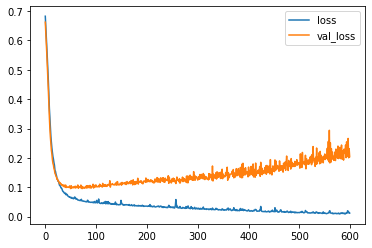

In [114]:
losses.plot()
# this is an example of overfitting, can see at the beginning during the first epochs, both validation and training losses are decreasing
# this means that we havent had 50 training data. However, at a certain point the validation loss begins to increase, whilst training loss is still going down
# this means that we are overfitting our training dataset, so we have too many epochs

In [115]:
# let apply early callbacks
# reapply the model from scratch

model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [116]:
from tensorflow.keras.callbacks import EarlyStopping

In [117]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be 'loss', and mode would be 'min'. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Example:
 |  
 |  >>> callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
 |  >>> # This cal

In [118]:
# there are two modes for early stopping, min and max, depending what you are monitoring. 
# Max is for things like accuracy, which you want to maximise
# loss is something you want to minimise

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
# patients means we will wait 25 epochs even after we've detected a stopping point because noise could occur

In [119]:
# make sure to reapply the model at this point
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6827 - val_loss: 0.6694
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6573 - val_loss: 0.6428
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6298 - val_loss: 0.6127
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5985 - val_loss: 0.5793
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5613 - val_loss: 0.5395
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5194 - val_loss: 0.4931
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4743 - val_loss: 0.4454
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4270 - val_loss: 0.3988
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3831 - val_loss: 0.3542
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3430 - val_loss: 0.3141
Epoch 11/

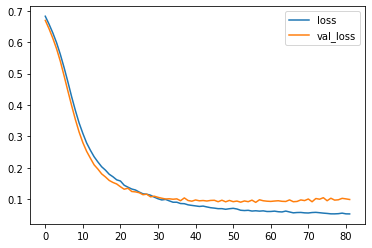

In [120]:
# lets look at new model loss
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [121]:
from tensorflow.keras.layers import Dropout

In [122]:
# third thing to do to prevent overfitting are dropout layers
# dropout will turn off a percentage of neurons randomly

#reapply model

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
# rate is the probability to randomly turn off neurons. common values are 0.2 to 0.5

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [123]:
# can keep using early stopping
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6779 - val_loss: 0.6486
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6523 - val_loss: 0.6207
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6337 - val_loss: 0.5925
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5901 - val_loss: 0.5653
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5819 - val_loss: 0.5377
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5720 - val_loss: 0.5194
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5534 - val_loss: 0.4828
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5211 - val_loss: 0.4534
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5014 - val_loss: 0.4252
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4653 - val_loss: 0.3966
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.1222 - val_loss: 0.0989
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1220 - val_loss: 0.1067
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1021 - val_loss: 0.0969
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1031 - val_loss: 0.1046
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1000 - val_loss: 0.0980
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0980 - val_loss: 0.0936
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1150 - val_loss: 0.1058
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1113 - val_loss: 0.0932
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1080 - val_loss: 0.0960
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1140 - val_loss: 0.0947
Epoch 93/600


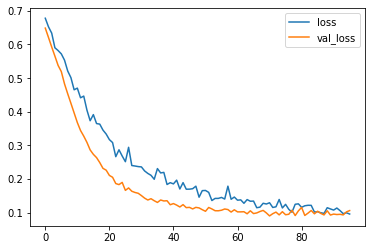

In [124]:
# check out model loss
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Evaluation on classes

In [125]:
predictions = model.predict_classes(X_test)

In [126]:
from sklearn.metrics import classification_report,confusion_matrix

In [127]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [128]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
